In [38]:
# Do sentiment classification on IMDB using SimpleRNN and LSTM

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, SimpleRNN, LSTM
from keras import optimizers
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
# Steps of getting text data into format useable for ML:
# tokenization: chop our text into a sequence of word tokens
# encoding: (build vocabulary of the word tokens that occur in BOTH training and the test data)
# alignment
# word vector encoding: (since NNs deal with vector inputs, convert each integer/word to a vector)

In [2]:
# load our training data (it has been tokenized and encoded)
num_distinct_words = 10000 # load the most frequent words only (all other words are replaced with a special OTHER token)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape)

(25000,)


In [3]:
x_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
y_train[0:2]

array([1, 0])

In [5]:
[len(sample) for sample in x_train[0:5]]

[218, 189, 141, 550, 147]

In [10]:
wordnum = 20
x_train = pad_sequences(x_train, maxlen=wordnum) # pads/truncates (if it truncates, it chops off the beginning of the sequence) to wordnum tokens
x_test = pad_sequences(x_test, maxlen=wordnum)
(x_train.shape, x_test.shape)

((25000, 20), (25000, 20))

In [11]:
x_train[:2,:]

array([[  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
         113,  103,   32,   15,   16, 5345,   19,  178,   32],
       [  23,    4, 1690,   15,   16,    4, 1355,    5,   28,    6,   52,
         154,  462,   33,   89,   78,  285,   16,  145,   95]],
      dtype=int32)

In [18]:
# Use a non-temporal neural network approach to sentiment classification: flatten the input 20 embedding vectors into one long vector
embedding_dim = 8
model = Sequential([
    Embedding(num_distinct_words, embedding_dim, input_length=wordnum), # layer takes as input shape (batchsize, input_length) 
    # and outputs (batchsize, input_length, embedding_dim)
    Dense(160),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
dense_1 (Dense)              (None, 20, 160)           1440      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3201      
Total params: 84,641
Trainable params: 84,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
# train
epochs = 50
model.compile(optimizer = optimizers.RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.2)
loss_and_acc = model.evaluate(x_test, y_test)

Epoch 1/50
625/625 [==============================] - 1s 1ms/step - loss: 0.6927 - acc: 0.5199 - val_loss: 0.6913 - val_acc: 0.5692
Epoch 2/50
625/625 [==============================] - 1s 1ms/step - loss: 0.6848 - acc: 0.6189 - val_loss: 0.6751 - val_acc: 0.6392
Epoch 3/50
625/625 [==============================] - 1s 983us/step - loss: 0.6435 - acc: 0.6845 - val_loss: 0.6166 - val_acc: 0.6806
Epoch 4/50
625/625 [==============================] - 1s 996us/step - loss: 0.5684 - acc: 0.7199 - val_loss: 0.5601 - val_acc: 0.7014
Epoch 5/50
625/625 [==============================] - 1s 999us/step - loss: 0.5153 - acc: 0.7465 - val_loss: 0.5335 - val_acc: 0.7154
Epoch 6/50
625/625 [==============================] - 1s 981us/step - loss: 0.4847 - acc: 0.7648 - val_loss: 0.5192 - val_acc: 0.7300
Epoch 7/50
625/625 [==============================] - 1s 983us/step - loss: 0.4640 - acc: 0.7781 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 8/50
625/625 [==============================] - 1s 976us/ste

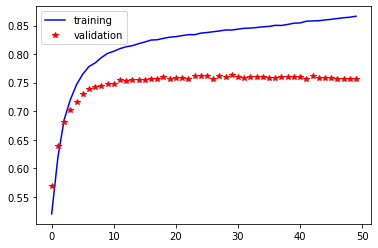

Test Loss: 0.521
Test Accuracy: 0.763


In [23]:
plt.plot(range(epochs), history.history['acc'], 'b-', label='training')
plt.plot(range(epochs), history.history['val_acc'], 'r*', label='validation')
plt.legend()
plt.show()

print("Test Loss: %.3f\nTest Accuracy: %.3f" % (loss_and_acc[0], loss_and_acc[1]))

In [ ]:
# Vanilla RNN: attempt 1

In [29]:
state_dim = 32

model = Sequential([
    Embedding(num_distinct_words, embedding_dim, input_length=wordnum),
    SimpleRNN(state_dim, return_sequences=False), # will only return the last state
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                1312      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 81,345
Trainable params: 81,345
Non-trainable params: 0
_________________________________________________________________


In [30]:
epochs = 10
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.2)
loss_and_acc = model.evaluate(x_test, y_test)

Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.6137 - acc: 0.6413 - val_loss: 0.5425 - val_acc: 0.7196
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4636 - acc: 0.7821 - val_loss: 0.4951 - val_acc: 0.7506
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4175 - acc: 0.8090 - val_loss: 0.5063 - val_acc: 0.7542
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3878 - acc: 0.8280 - val_loss: 0.5208 - val_acc: 0.7530
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3533 - acc: 0.8472 - val_loss: 0.5254 - val_acc: 0.7472
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3132 - acc: 0.8669 - val_loss: 0.5443 - val_acc: 0.7480
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2735 - acc: 0.8895 - val_loss: 0.6033 - val_acc: 0.7280
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

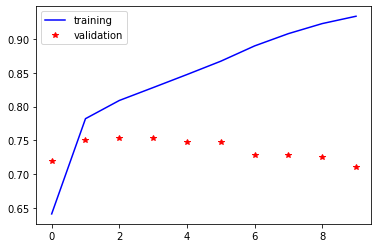

Test Loss: 0.737
Test Accuracy: 0.717


In [31]:
plt.plot(range(epochs), history.history['acc'], 'b-', label='training')
plt.plot(range(epochs), history.history['val_acc'], 'r*', label='validation')
plt.legend()
plt.show()

print("Test Loss: %.3f\nTest Accuracy: %.3f" % (loss_and_acc[0], loss_and_acc[1]))
# It looks like RNNs are a more complicated model, so we need to use more training data (longer sequences)

In [34]:
# Vanilla RNN: attempt 2
# use longer training sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)

wordnum = 500
x_train = pad_sequences(x_train, maxlen=wordnum) # pads/truncates (if it truncates, it chops off the beginning of the sequence) to wordnum tokens
x_test = pad_sequences(x_test, maxlen=wordnum)


In [35]:
state_dim = 32
embedding_dim = 32

model = Sequential([
    Embedding(num_distinct_words, embedding_dim, input_length=wordnum),
    SimpleRNN(state_dim, return_sequences=False), # will only return the last state
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs = 3
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.2)
loss_and_acc = model.evaluate(x_test, y_test)

Epoch 1/3
625/625 [==============================] - 43s 69ms/step - loss: 0.5522 - acc: 0.6991 - val_loss: 0.4287 - val_acc: 0.8100
Epoch 2/3
625/625 [==============================] - 47s 75ms/step - loss: 0.3550 - acc: 0.8531 - val_loss: 0.3759 - val_acc: 0.8356
Epoch 3/3
782/782 [==============================] - 13s 17ms/step - loss: 0.3942 - acc: 0.8284


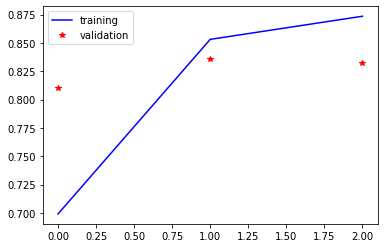

Test Loss: 0.394
Test Accuracy: 0.828


In [37]:
plt.plot(range(epochs), history.history['acc'], 'b-', label='training')
plt.plot(range(epochs), history.history['val_acc'], 'r*', label='validation')
plt.legend()
plt.show()

print("Test Loss: %.3f\nTest Accuracy: %.3f" % (loss_and_acc[0], loss_and_acc[1]))

In [44]:
# LSTM

model = Sequential([
    Embedding(num_distinct_words, embedding_dim, input_length=wordnum),
    LSTM(state_dim, return_sequences=False), # will only return the last state
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [40]:
epochs = 3
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.2)
loss_and_acc = model.evaluate(x_test, y_test)

Epoch 1/3
625/625 [==============================] - 67s 108ms/step - loss: 0.4334 - acc: 0.7991 - val_loss: 0.3377 - val_acc: 0.8710
Epoch 2/3
625/625 [==============================] - 76s 122ms/step - loss: 0.2668 - acc: 0.8974 - val_loss: 0.4539 - val_acc: 0.8326
Epoch 3/3
782/782 [==============================] - 27s 35ms/step - loss: 0.2964 - acc: 0.8764


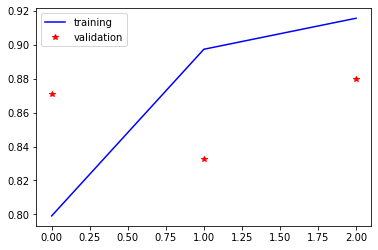

Test Loss: 0.296
Test Accuracy: 0.876


In [41]:
plt.plot(range(epochs), history.history['acc'], 'b-', label='training')
plt.plot(range(epochs), history.history['val_acc'], 'r*', label='validation')
plt.legend()
plt.show()

print("Test Loss: %.3f\nTest Accuracy: %.3f" % (loss_and_acc[0], loss_and_acc[1]))